# Import

## Librairies

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Fichier

In [2]:
billets = pd.read_csv('billets.csv', sep=';', encoding='latin-1')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Analyse exploratoire

## Structure

In [3]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
billets.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

## NaN & duplicated

In [5]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

On voit ici que pour la colonne "margin_low" nous avons 37 valeurs manquantes.

In [6]:
# Compter le nombre de valeurs dupliqués
billets.duplicated().sum()

0

In [7]:
# Compter le nombre de valeurs dupliqués en enlevant la première colonne
billets.drop(columns="is_genuine").duplicated().sum()

0

 Nous n'avons pas de doublons dans notre jeu de données

## Data inspection

In [8]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [9]:
# Observer la répartition de ma variable d'étude principale (ici si le billet est vrai ou non)

billets.iloc[:,0].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

 Nous avons bien 1000 True et 500 False dans ce jeu de données

## Rename columns

In [10]:
billets = billets.rename(columns={"is_genuine":"target"})
billets.sample()

,target,diagonal,height_left,height_right,margin_low,margin_up,length
870,True,172.14,104.34,103.98,3.84,2.98,113.05


## Disstribution

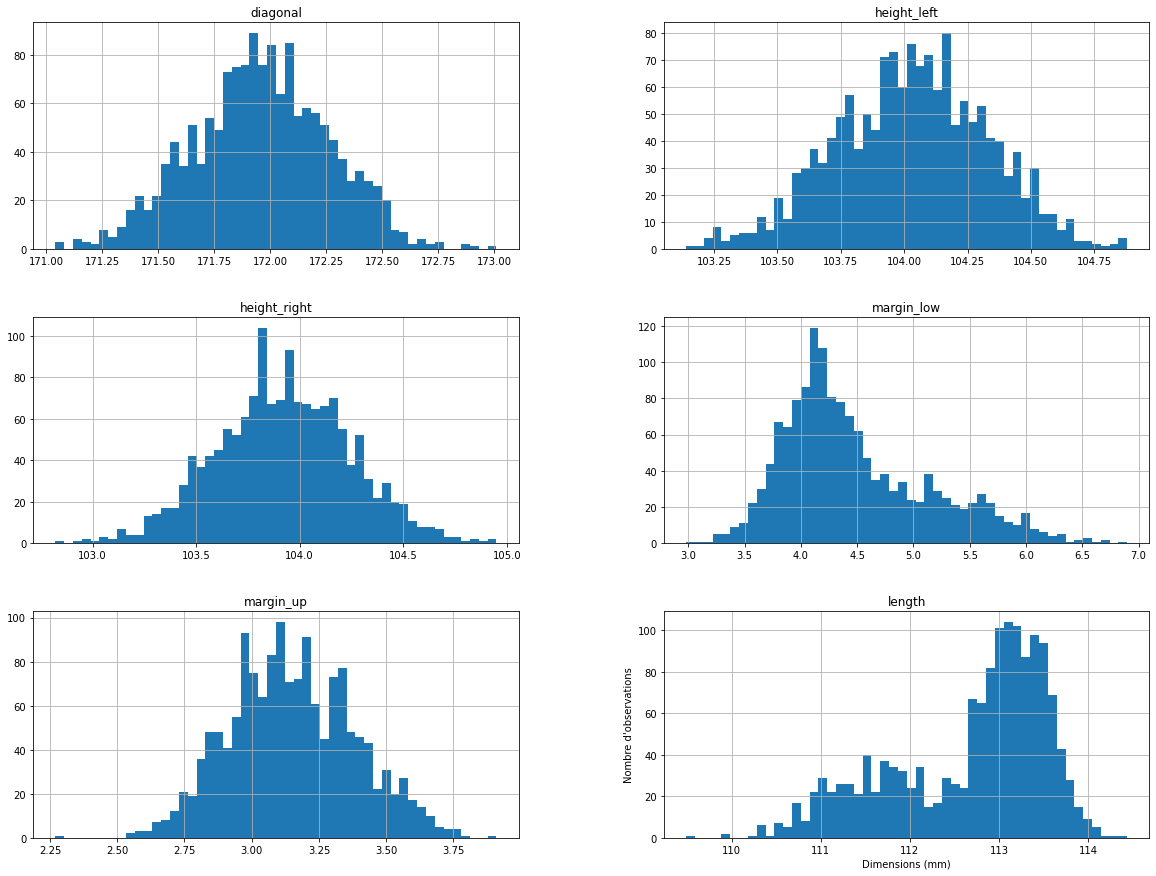

In [12]:
# Créer l'histogramme
billets.hist(bins=50, figsize=(20,15))

# Afficher l'histogramme
plt.show()

 Les variables "margin_low" et "lenght" sont les seules qui ont une disstribution qui évalue en sens inverse l'une de l'autre. Il semble avoir une anticorrélation entre ces 2 variables. Elles ne suivent pas une lois normale.
 
 Les autres variables suivent une disstribution gausienne avec une plus forte concentration au milieu et qui diminue en s'éloignant du cente de manière quasi-identique des deux côtés.

## Matrice des corrélations

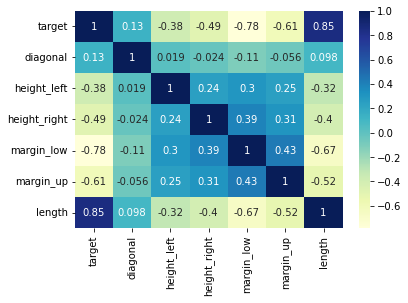

In [12]:
# Calculer la matrice de corrélation
corr_matrix = billets.corr()

# Afficher un heatmap pour visualiser les corrélations
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()


 Les variables "margin_low" et "lenght" sont déterminantes pour savoir s'il s'agit d'un faux ou d'un vrai billet. Ces variables sont assez fortement anti-corrélés.

## Différences entre un vrai et faux billet avec des paramètres 1 par 1

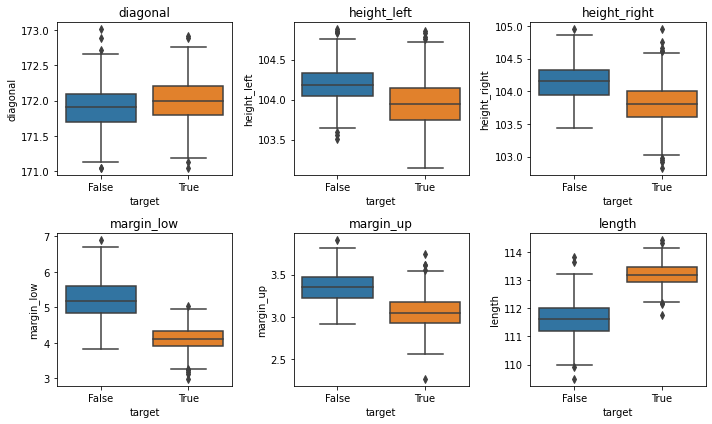

In [22]:
# Créer une grille de sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Afficher les boxplots pour chaque variable quantitative
sns.boxplot(x='target', y='diagonal', data=billets, ax=axes[0, 0])
sns.boxplot(x='target', y='height_left', data=billets, ax=axes[0, 1])
sns.boxplot(x='target', y='height_right', data=billets, ax=axes[0, 2])
sns.boxplot(x='target', y='margin_low', data=billets, ax=axes[1, 0])
sns.boxplot(x='target', y='margin_up', data=billets, ax=axes[1, 1])
sns.boxplot(x='target', y='length', data=billets, ax=axes[1, 2])

# Ajouter le titre à chaque graphique
axes[0, 0].set_title('diagonal')
axes[0, 1].set_title('height_left')
axes[0, 2].set_title('height_right')
axes[1, 0].set_title('margin_low')
axes[1, 1].set_title('margin_up')
axes[1, 2].set_title('length')

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


  On observe ici que de manière individuelle il existe des différences plus ou moins prononcées selon chaque paramètre entre un vrai et un faux billet. Par exemple le paramètre comme « diagonal » est quasiment identique entre un vrai et un faux billet. Il est donc très probable qu’il sera difficile de faire une différenciation sur ce critère. Cependant d’autres paramètres comme « lenght », « margin_low »... ont des valeurs très différentes entre les vrais et les faux billets. Donc contrairement à la variable « diagonal », ces paramètres peuvent potentiellement nous permettre de construire notre modèle de détection de faux billets. 

# Export

In [13]:
billets.to_csv(r'C:\Users\Pavel\Desktop\P10\billets_clean.csv', index = False)